<a href="https://colab.research.google.com/github/yogi2094/yogi2094/blob/main/notebook2eb27eb745.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
ealaxi_paysim1_path = kagglehub.dataset_download('ealaxi/paysim1')

print('Data source import complete.')


100%|██████████| 178M/178M [00:02<00:00, 86.0MB/s]

Extracting files...


Data source import complete.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import kagglehub
path = kagglehub.dataset_download("ealaxi/paysim1")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2


In [8]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2/PS_20174392719_1491204439457_log.csv')

In [9]:
print('Data does not have any NULL value.')
data.isnull().any()

Data does not have any NULL value.


,0
step,False
type,False
amount,False
nameOrig,False
oldbalanceOrg,False
newbalanceOrig,False
nameDest,False
oldbalanceDest,False
newbalanceDest,False
isFraud,False


In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
data.shape

(6362620, 11)

In [12]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
data.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

The provided data has the financial transaction data as well as the target variable **isFraud**, which is the actual fraud status of the transaction and **isFlaggedFraud** is the indicator which the simulation is used to flag the transaction using some **threshold value**.

## Data Analysis



----

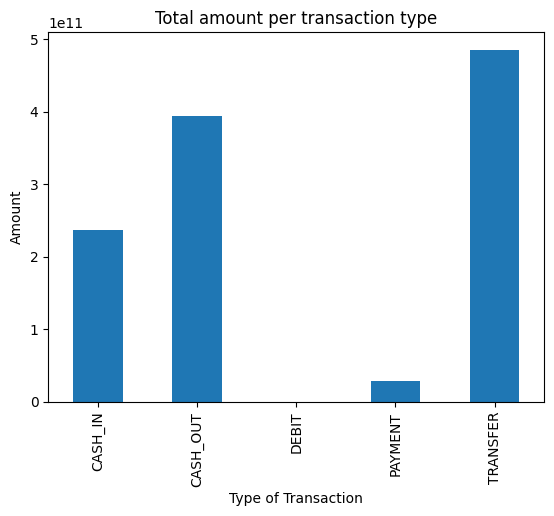

In [13]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [14]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

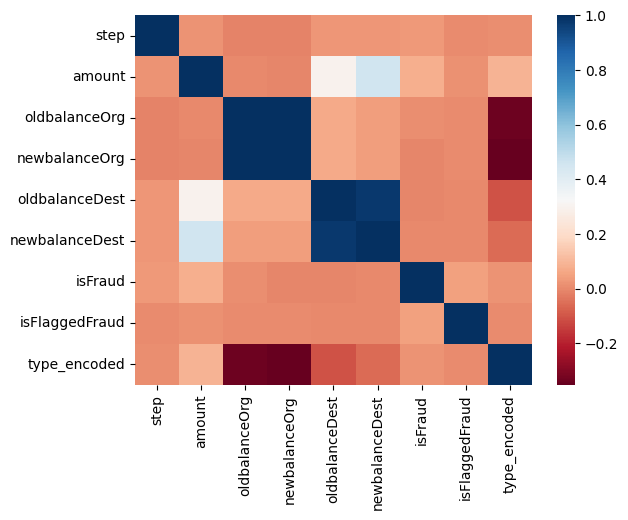

In [19]:

from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

# Now calculate the correlation matrix using only numerical columns
# and plot the heatmap
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, cmap='RdBu')
plt.show()

In [20]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [21]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

In [23]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [24]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [25]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

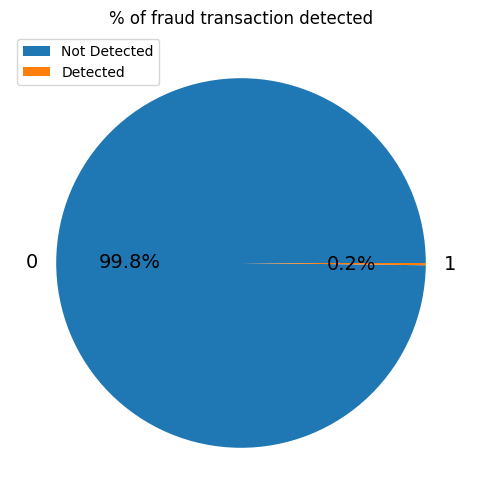

In [26]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

In [47]:
# For the entire dataset
print("Class distribution in FULL dataset:")
print(data['isFraud'].value_counts())

# For training set only (after train-test split)
print("\nClass distribution in TRAINING set:")
print(train_y.value_counts())

# For testing set only
print("\nClass distribution in TESTING set:")
print(test_y.value_counts())

Class distribution in FULL dataset:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Class distribution in TRAINING set:
isFraud
0          5083571
1             6525
Name: count, dtype: int64

Class distribution in TESTING set:
isFraud
0          1270836
1             1688
Name: count, dtype: int64


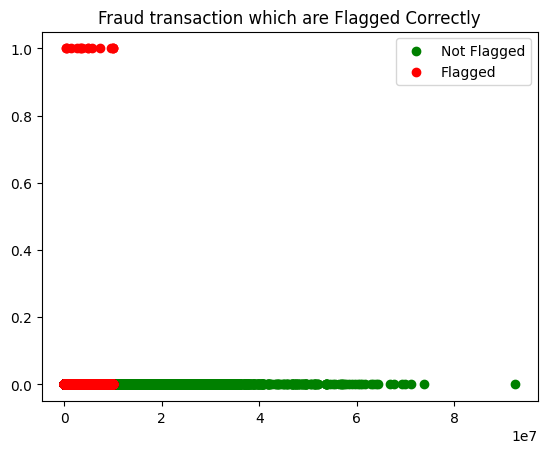

In [27]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

The plot above clearly shows the **need** for a system which can be **fast** and **reliable** to mark the transaction which is fraud. Since, the current system is letting fraud transaction able to **pass through a system** which is **not labeling them as a fraud**. Some data exploration can be helpful to check for the relation between features.

## Data Exploration

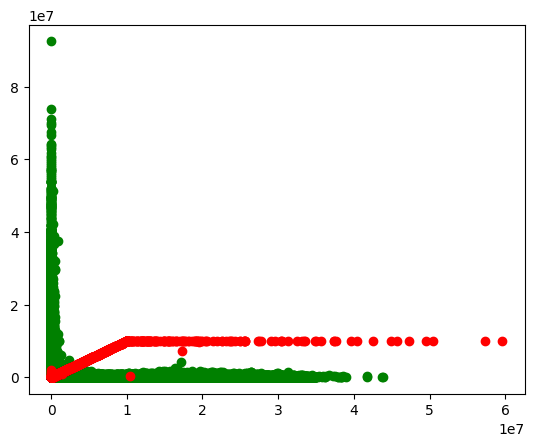

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

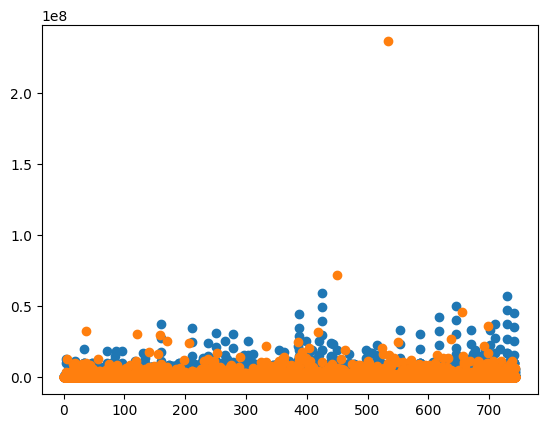

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

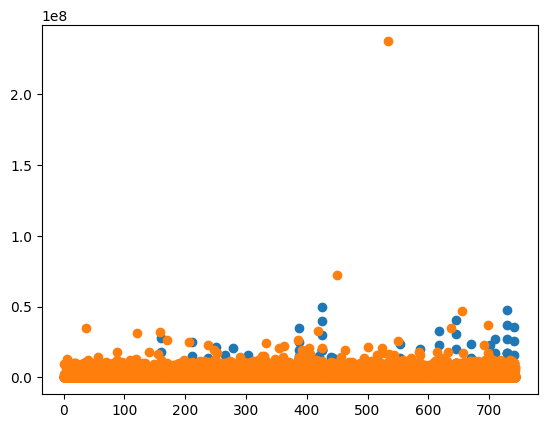

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

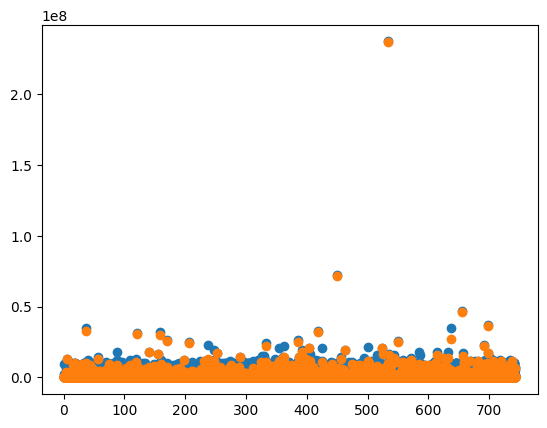

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

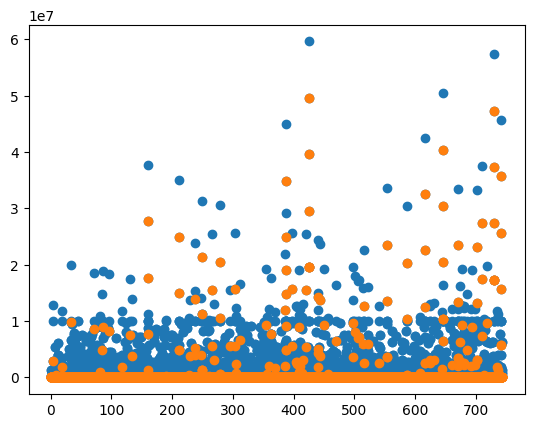

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

## Data Cleaning

In [33]:
import pandas as pd
import numpy as np
import pickle

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
data_fraud = pd.read_csv('/root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2/PS_20174392719_1491204439457_log.csv')

In [38]:
data_fraud = data_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

<ipython-input-38-ff9f954430bd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_fraud = data_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,


In [39]:
data_fraud.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [40]:
data_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [41]:
X = data_fraud.drop(['isFraud'],axis=1)
y = data_fraud[['isFraud']]

## Machine Learning Model

In [42]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [44]:
print(pd.Series(train_y_res['isFraud']).value_counts())

isFraud
0    5083571
1    5083571
Name: count, dtype: int64


In [48]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

clf = RandomForestClassifier(n_estimators=15)
sm = SMOTE(random_state=42)
train_X_res, train_y_res = sm.fit_resample(train_X, train_y)

# Verify new class distribution
print("Resampled class counts:")
# Extract the 'isFraud' column as a 1D array or Series
print(pd.Series(train_y_res['isFraud'].values).value_counts())
# or
# print(train_y_res['isFraud'].value_counts())

Resampled class counts:
0    5083571
1    5083571
Name: count, dtype: int64


In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [50]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [52]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.768584323786009


**Average precision score is 0.7687.**